In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [5]:
user_dt = pd.read_csv('Data/user_data.csv', sep=',', header=0)
user_dt.head()

,event_time,user_id,event,channel,user_lat,user_long,origin,ad_id,images_count,ad_impressions,ad_views,ad_messages
0,2017-05-19 10:47:22,541,view,ios,-34.600439,-58.514031,browse_search,2426321,6.0,0.0,4.0,0.0
1,2017-06-10 10:18:12,501,view,android,-34.818047,-58.356583,browse_search,2746814,5.0,152.0,85.0,1.0
2,2017-06-11 00:44:57,559,view,android,-34.688454,-58.333435,browse,1123948,4.0,899.0,22.0,1.0
3,2017-05-22 02:36:06,637,first_message,android,-34.548401,-58.485168,search,2273498,NaN,0.0,21.0,2.0
4,2017-06-08 15:45:35,509,view,android,-34.582088,-58.405041,home,2722493,3.0,1529.0,132.0,3.0


In [6]:
ads_dt = pd.read_csv('Data/ads_data.csv', sep=',', header=0)
ads_dt.head()

,ad_id,category_id,seller_id,creation_time,title,description,price,lat,long,source,enabled
0,1344,800,1157,2015-11-29 13:05:26,Blackberry curve,"Funcionando, es para personal el único problem...",300.0,NaN,NaN,android,0
1,3916,815,59,2015-12-16 09:09:25,Remera marca premium alemana,Casi nuevo y sin uso. Lo compre online y me qu...,150.0,NaN,NaN,android,1
2,11738,806,12298,2016-01-19 18:38:24,Juego de sillones estilo campo,Divino juego de sillones de diseño campo,1500.0,NaN,NaN,android,1
3,14939,815,1349,2016-01-30 23:47:30,Zapatillas,Zapatillas nro 39 dos usos,250.0,NaN,NaN,android,0
4,16820,815,16365,2016-02-05 10:22:29,Vestido de seda negro,Vestido importado de usa. Muy fino y elegante ...,500.0,NaN,NaN,android,0


In [7]:
user_ad_interests_dt = pd.read_csv('Data/user_messages.csv', sep=',', header=0)
user_ad_interests_dt.head()
# remember this is the ads a user went to (in a 7 day period) after the 30 days prior of the user_data

,user_id,category_id,ads
0,1,859,[1806476]
1,3,800,"[2131700, 2734107, 2877209, 2877209]"
2,4,815,[2883211]
3,7,815,"[2429412, 2886810, 2886804]"
4,7,362,[2909301]


In [8]:
categories = ads_dt['category_id'].unique()

## Analysing Ads with most messages ##

In [9]:
# using the ads with the most messages that are sorted and duplicates removed, find out how much of the messages
#  are represented by 20% of the population:

# remove all nan data
user_dt_messages_clean = user_dt[user_dt['ad_messages'].isnull() == False]

# merge the user data and the ad data
user_dt_msg_with_ads_data = ads_dt.merge(user_dt_messages_clean, on='ad_id')
user_dt_msg_with_ads_data_sort = user_dt_msg_with_ads_data.sort_values('ad_messages', ascending = False)
user_dt_msg_with_ads_data_sort.head()

# remove duplicates
user_dt_msg_with_ads_data_sort_no_dups = user_dt_msg_with_ads_data_sort[user_dt_msg_with_ads_data_sort.duplicated(subset='ad_id', keep='first') == False]

# clear old arrays
del user_dt_messages_clean
del user_dt_msg_with_ads_data
del user_dt_msg_with_ads_data_sort

user_dt_msg_with_ads_data_sort_no_dups.head()



,ad_id,category_id,seller_id,creation_time,title,description,price,lat,long,source,...,user_id,event,channel,user_lat,user_long,origin,images_count,ad_impressions,ad_views,ad_messages
1918128,2804693,806,434981,2017-06-07 19:54:42,planta de limon,planta de limón,149.0,NaN,NaN,apple,...,1966,view,android,-34.543266,-58.692127,browse_search,1.0,693295.0,7165.0,189.0
1337225,2814436,800,635875,2017-06-08 22:30:32,iPhone 6 en excelente estado !,iPhone 6 en excelente estado !! muy poco uso.c...,8000.0,NaN,NaN,apple,...,4171,view,android,-34.581360,-58.420368,search,6.0,205481.0,3696.0,118.0
1513127,2726025,815,490708,2017-05-28 22:41:53,Buzo abrigado abercrombie,"Muy abrigado, Azul, peludito adentro, letras p...",260.0,NaN,NaN,apple,...,5751,view,android,-34.663368,-58.508793,notification_center,2.0,79.0,730.0,99.0
417601,2347424,815,540480,2017-04-13 21:02:43,Campera cuero negra. Sin uso,NaN,500.0,NaN,NaN,android,...,10204,view,android,-34.645706,-58.570988,search,3.0,257.0,1122.0,99.0
1307236,2598159,362,335997,2017-05-14 10:47:19,Fiat 147 modelo 87,Papeles al dia,12000.0,NaN,NaN,android,...,4622,view,android,-34.726551,-58.322262,browse_search,4.0,645.0,527.0,92.0


**Now we are going to analyse if our data follows the Pareto distribution: that is if 20% of the population represents 80% of the total messages of the entire population** (OMG IT DOES FOLLOW THE PARETO DISTRIBUTION!!!!!!)

For now, we will use a small percentage of the top ads in order for out model to be small and easily maneagable

In [163]:
twenty_percent_indx = int(len(user_dt_msg_with_ads_data_sort_no_dups) * 0.2)
user_dt_ad_dt_twenty_percent = user_dt_msg_with_ads_data_sort_no_dups[0:twenty_percent_indx]
num_messages_20p = sum(user_dt_ad_dt_twenty_percent['ad_messages'].values)
num_messages_100p = sum(user_dt_msg_with_ads_data_sort_no_dups['ad_messages'].values)
print("number of messages of top 20% of ads: {}".format(num_messages_20p))
print("number of messages of top 100% of ads: {}".format(num_messages_100p))
percent_rep_20p = 100.0 * num_messages_20p / num_messages_100p
print("{}% of ad messages represented by top 20% of the ads ({} ads)".format(percent_rep_20p, twenty_percent_indx))


number of messages of top 20% of ads: 317846.0
number of messages of top 100% of ads: 381938.0
83.2192659541601% of ad messages represented by top 20% of the ads (105184 ads)


In [164]:
# calculate prioir for neuron distribution of set weights
for c in categories:
    print("prior for {} is: {}".format(c, sum(user_dt_ad_dt_twenty_percent.loc[user_dt_ad_dt_twenty_percent['category_id'] == c]['ad_messages'].values) / num_messages_20p))

prior for 800 is: 0.22111022318984666
prior for 815 is: 0.3164488462966342
prior for 806 is: 0.13659445140099294
prior for 859 is: 0.011184661754434538
prior for 811 is: 0.034677170705310116
prior for 853 is: 0.06937007229916374
prior for 881 is: 0.025798657211353927
prior for 888 is: 0.09835580752943249
prior for 887 is: 0.024480408751407914
prior for 362 is: 0.06197970086142346


** DATASET: ** we now must compile the dataset which is |U|x|N| where |U| is the number of user_ids we are training on (that must have some minimum number of ads messaged in the top x% of ads - NOTE: could change to views later - NOTE2: views could be 1/10 of a message value) and |N| is the number of ads in the top x% of ads. A single user feature vector is a binary vector where each feature is 1 if the user sent a message to the ad_id associated with that feature, otherwise it is 0. 

In [165]:
# this is the data we have to use to create the feature-vector training format:
user_dt_ad_dt_twenty_percent.head()

,ad_id,category_id,seller_id,creation_time,title,description,price,lat,long,source,...,user_id,event,channel,user_lat,user_long,origin,images_count,ad_impressions,ad_views,ad_messages
1918128,2804693,806,434981,2017-06-07 19:54:42,planta de limon,planta de limón,149.0,NaN,NaN,apple,...,1966,view,android,-34.543266,-58.692127,browse_search,1.0,693295.0,7165.0,189.0
1337225,2814436,800,635875,2017-06-08 22:30:32,iPhone 6 en excelente estado !,iPhone 6 en excelente estado !! muy poco uso.c...,8000.0,NaN,NaN,apple,...,4171,view,android,-34.581360,-58.420368,search,6.0,205481.0,3696.0,118.0
1513127,2726025,815,490708,2017-05-28 22:41:53,Buzo abrigado abercrombie,"Muy abrigado, Azul, peludito adentro, letras p...",260.0,NaN,NaN,apple,...,5751,view,android,-34.663368,-58.508793,notification_center,2.0,79.0,730.0,99.0
417601,2347424,815,540480,2017-04-13 21:02:43,Campera cuero negra. Sin uso,NaN,500.0,NaN,NaN,android,...,10204,view,android,-34.645706,-58.570988,search,3.0,257.0,1122.0,99.0
1307236,2598159,362,335997,2017-05-14 10:47:19,Fiat 147 modelo 87,Papeles al dia,12000.0,NaN,NaN,android,...,4622,view,android,-34.726551,-58.322262,browse_search,4.0,645.0,527.0,92.0


In [166]:
# NOTE: the above data has removed duplicate events where ad_ids were the same. This is not good for what we want
#  because two events with the same ad_id could be from different users
top_ad_ids = user_dt_ad_dt_twenty_percent['ad_id'].values
print("top ad_ids in descending order: {}".format(top_ad_ids))
print("number of ads: {}".format(len(top_ad_ids)))

top ad_ids in descending order: [2804693 2814436 2726025 ..., 2838188  435806 2820243]
number of ads: 105184


In [330]:
# get the user_ids used for the training set:
user_ids_train = user_ad_interests_dt['user_id'].values.astype(np.uint16)
user_cats_train = user_ad_interests_dt['category_id'].values.astype(np.uint16)
user_ads_future_train = [np.fromstring(a[1:], sep=',', dtype=np.int32) for a in user_ad_interests_dt['ads'].values]
print("user ids for training: {}".format(user_ids_train))
print("user cats for training: {}".format(user_cats_train))
print("user ads future or training: {}".format(user_ads_future_train))
print("number of users: {}".format(len(user_ids_train)))

user ids for training: [    1     3     4 ..., 15056 15061 15066]
user cats for training: [859 800 815 ..., 815 806 853]
user ads future or training: [array([1806476], dtype=int32), array([2131700, 2734107, 2877209, 2877209], dtype=int32), array([2883211], dtype=int32), array([2429412, 2886810, 2886804], dtype=int32), array([2909301], dtype=int32), array([89573], dtype=int32), array([2182646], dtype=int32), array([2910937, 2836340, 2884417], dtype=int32), array([2679430, 1664304], dtype=int32), array([1864397, 2913442, 1801396], dtype=int32), array([2691952], dtype=int32), array([2726576], dtype=int32), array([2070408, 2866207, 2841786], dtype=int32), array([1954725, 2368264, 2819220, 2039982], dtype=int32), array([2882642, 2894705, 2915325, 2905871], dtype=int32), array([2916864], dtype=int32), array([2917374], dtype=int32), array([2879268, 2827203, 2887420, 2002760, 2829641, 2874015,  710159,
       2707989, 2897284, 2916683], dtype=int32), array([1429720, 2582177, 2357783, 2208312, 

In [324]:
# get the user_ids used for the test set:
user_messages_test = pd.read_csv('Data/user_messages_test.csv', sep=',', header=0)
user_ids_test = user_messages_test['user_id'].values.astype(np.uint16)
user_cats_test = user_messages_test['category_id'].values.astype(np.uint16)
print("user ids for training: {}".format(user_ids_test))
print("user cats for training: {}".format(user_cats_test))
print("number of users: {}".format(len(user_ids_test)))

user ids for training: [    2     6    14 ..., 15059 15060 15064]
user cats for training: [800 815 811 ..., 806 815 881]
number of users: 10507


In [169]:
# we now iterate through each interaction event of the users and find all the ads they have messaged or with
user_data_fm = user_dt[user_dt['event'].apply((lambda event: event == 'first_message'))]
user_data_fm_ad = user_data_fm[user_data_fm['ad_id'].apply(lambda ad_id: ad_id in top_ad_ids)]
del user_data_fm

** Compiling train data:**  pair users with the ads the have clicked

In [369]:
#data_train = pd.DataFrame()#data=None, columns=top_ad_ids, dtype=np.uint8)
# np.fromstring(user_ad_interests_dt[user_ad_interests_dt['user_id'] == 3]['ads'].values[0][1:], sep=',', dtype=np.int32)
#d = [[[np.uint8(([u, a] in user_data_fm_ad[['user_id', 'ad_id'] or
#        a in np.fromstring(user_ad_interests_dt[user_ad_interests_dt['user_id'] == u]['ads'].values[0][1:], sep=',', dtype=np.int32)].values))]
#      for a in top_ad_ids] for u in user_ids_train]
user_ads_messaged_train = []
df_cat_fm = pd.DataFrame.merge(user_data_fm_ad, ads_dt, on='ad_id')
# print(df_cat_fm.head())
counter = 0
for u in range(0, len(user_ids_train)):
#     user_ads_local = df_cat_fm[df_cat_fm[['user_id', 'category_id']].values == [user_ids_train[u], user_cats_train[u]]]
    user_ads_local = df_cat_fm.loc[df_cat_fm['user_id'] == user_ids_train[u]]
    user_ads_local = user_ads_local.loc[user_ads_local['category_id'] == user_cats_train[u]]
#     print(user_ids_train[u])
#     print(user_cats_train[u])
#     print(user_ads_local)
#     user_ads_future_choices = np.fromstring(
#         user_ad_interests_dt[user_ad_interests_dt['user_id'] == u && user_cats_interests_dt['user_id'] == u]['ads'].values[0][1:], 
#                   sep=',', dtype=np.int32)
#     print("user: {}".format(u))
    data_1 = np.hstack((user_ads_local['ad_id'].values, user_ads_future_train[u]))
#     print("\t{}".format(data_1))
    if len(data_1) > 0:
        user_ads_messaged_train.append(data_1)
    
    counter += 1
    if counter % 1000 == 0:
        print("parsed {} users.".format(counter))
    
# print(user_ads_messaged_train)
# d = [[u] for u in user_ids_train]
# print(d)

parsed 1000 users.
parsed 2000 users.
parsed 3000 users.
parsed 4000 users.
parsed 5000 users.
parsed 6000 users.
parsed 7000 users.
parsed 8000 users.
parsed 9000 users.
parsed 10000 users.


In [370]:
print(user_ads_messaged_train[0:10])

[array([1806476]), array([2131700, 2734107, 2877209, 2877209]), array([2678043, 2883211]), array([2429412, 2886810, 2886804]), array([2909301]), array([2055748, 1770162,   89573]), array([2182646]), array([2456273, 2910937, 2836340, 2884417]), array([2679430, 1664304]), array([1864397, 2913442, 1801396])]


In [378]:
user_ads_messaged_test = []
counter = 0
df_cat_fm = pd.DataFrame.merge(user_data_fm_ad, ads_dt, on='ad_id')
for u in range(0, len(user_ids_test)):
#     user_ads_local = user_data_fm_ad[user_data_fm_ad['user_id'] == u]
    user_ads_local = df_cat_fm.loc[df_cat_fm['user_id'] == user_ids_test[u]]
    user_ads_local = user_ads_local.loc[user_ads_local['category_id'] == user_cats_test[u]]
#     print("\t{}".format(user_ads_local))
    user_ads_messaged_test.append(user_ads_local['ad_id'].values)
    
    counter += 1
    if counter % 1000 == 0:
        print("parsed {} users.".format(counter))

parsed 1000 users.
parsed 2000 users.
parsed 3000 users.
parsed 4000 users.
parsed 5000 users.
parsed 6000 users.
parsed 7000 users.
parsed 8000 users.
parsed 9000 users.
parsed 10000 users.


In [385]:
print(user_ads_messaged_test[0:10])
print(user_ids_test[0])
print(len(user_ads_messaged_test))

[array([], dtype=int64), array([2689567, 2694235, 2625376, 2695094, 2606923, 2621837, 2678043,
       2660939, 2646325, 2334757, 2691861, 2689024,  666579,  436095,
       2723843, 2661870, 1219713, 2664176, 2132587, 2581457, 2627898,
        802022, 2335340, 2686887, 2789753, 2420105, 2683613, 1145279]), array([], dtype=int64), array([2803185, 2802757,  270978, 2562564, 2245994, 2775134, 2814821,
       2861013, 2740641, 2843895]), array([2649742, 2586967]), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([], dtype=int64), array([2537294, 2704421, 2672100, 2053776,  264087, 2725012, 2068027])]
2
[800 815 811 800 815 811 806 800 800 888]
10507


** Compiling test data:**  pair users with the ads the have clicked

In [47]:
# use the Jaccard distance between all the training users and the test users to find similarity measures
def Jaccard_Distance(userA, userB):
    # how many similar features (ads) the two users share
    user_difference = 0
    for a in userA:
        if a in userB:
            user_difference += 1
    # how many total unique features (ads) between the two users
    user_union = len(userA) + len(userB)
    
    #Jaccard distance is now the ratio of these two values
    jac_dist = float(user_difference) / float(user_union)
    
    return jac_dist

In [379]:
# compute the Jaccard Distance between a single train user and all the test users
def Jaccard_Distance_Train_vs_Test(test_user, train_users, test_cat, train_cats):
    # iterate through all test users and compute Jaccard Distance to the train user
    sim_tests = np.zeros(shape=(np.shape(train_users)[0], 1), dtype=np.float32)
    for u in range(0, np.shape(train_users)[0]):
        if test_cat == train_cats[u]:
            sim_tests[u, 0] = Jaccard_Distance(test_user, train_users[u])
        else:
            sim_tests[u, 0] = -1
        
    return sim_tests

In [380]:
def Extract_Best_Ads_From_Jaccard(test_user, train_users, test_cat, train_cats):
    
    sim_tests = Jaccard_Distance_Train_vs_Test(test_user, train_users, test_cat, train_cats).T[0]
    # sort the values in the array and preserve index
#     print(sim_tests)
    indx_sort = sim_tests.argsort()[::-1] # <---- reverse the array
    #print(indx_sort)
#     print(sim_tests[indx_sort[0]])
    # iterate until we have filled the array with 10 possible recommendations
    sort_idx = 0
    ads_to_recommend = []
    while len(ads_to_recommend) < 10:
        # get the next most similar user and extract ads from
#         print(train_users[indx_sort[sort_idx]])
        next_rec = [a for a in train_users[indx_sort[sort_idx]] if not a in test_user]
        sort_idx += 1
        ads_to_recommend = np.hstack((ads_to_recommend, next_rec)).astype(np.int32)
#     most_similar_user = np.argmax(sim_tests)
    #ads_to_recommend = top_ad_ids[np.where(most_similar_user[0:len(top_ad_ids)] == 1 and test_user[0:len(top_ad_ids)] != 1)]
#     ads_to_recommend = [a for a in train_users[most_similar_user] if not a in test_user]
#     print(ads_to_recommend)
    return ads_to_recommend

In [381]:
def Fit_All_Test_Users(test_users, train_users, test_cats, train_cats):
    test_user_recommendations = []
    counter = 0
    for u in range(0, np.shape(test_users)[0]):
        ads_to_recommend = Extract_Best_Ads_From_Jaccard(test_users[u], train_users, test_cats[u], train_cats)
        test_user_recommendations.append(ads_to_recommend)
        
        counter += 1
        if counter % 500 == 0:
            print("{} users complete.".format(counter))
        
    return test_user_recommendations

**Use the training data of the users with Jaccard Distance to recommend to the test users:**

In [387]:
test_user_recommendations = Fit_All_Test_Users(user_ads_messaged_test, user_ads_messaged_train, user_cats_test, user_cats_train)

500 users complete.
1000 users complete.
1500 users complete.
2000 users complete.
2500 users complete.
3000 users complete.
3500 users complete.
4000 users complete.
4500 users complete.
5000 users complete.
5500 users complete.
6000 users complete.
6500 users complete.
7000 users complete.
7500 users complete.
8000 users complete.
8500 users complete.
9000 users complete.
9500 users complete.
10000 users complete.
10500 users complete.


In [388]:
print(test_user_recommendations[0:100])

[array([2588571, 2850542, 2358996, 2888513, 2833540, 2638728,  861618,
       1887903, 2615555, 2178735, 2757471, 2516110, 2635422, 2717730,
       2659059, 2629007, 2662350, 2691154, 2693829,  924488, 2624116,
       2826202, 2917661], dtype=int32), array([2883211, 2794561, 2760567, 2822958, 2876616, 2639673, 2720677,
       2734095, 2715932, 2911073], dtype=int32), array([2524732, 2339300, 2729639, 1354960, 2780271, 1934234,  426559,
       2883081, 2901813, 2830088, 2849193], dtype=int32), array([2880133, 2917669, 1342470, 2917652, 2664003, 2753964, 2438677,
       2640097, 2570736, 2762369, 2818754, 2869519, 2858325], dtype=int32), array([2323706, 2737727, 2523008, 2757907, 2795804, 2843722, 2877765,
       2736959, 2614519, 2511956, 2764900], dtype=int32), array([2524732, 2339300, 2729639, 1354960, 2780271, 1934234,  426559,
       2883081, 2901813, 2830088, 2849193], dtype=int32), array([2386977, 2077951, 2697441, 2759795, 2634928, 2771780,  390016,
       2067271, 1741865,  5460

In [389]:
# take the max of ten for each user recommendation
test_user_recommendations_clean = test_user_recommendations.copy()
for u in range(0, len(test_user_recommendations)):
    if len(test_user_recommendations_clean[u]) > 10:
        test_user_recommendations_clean[u] = test_user_recommendations_clean[u][0:10]
#     elif len(test_user_recommendations_clean[u]) == 1:
#         test_user_recommendations_clean[u].append(1806476)
#     elif len(test_user_recommendations_clean[u]) == 0:
#         test_user_recommendations_clean[u].append(1806476)
#         test_user_recommendations_clean[u].append(1806476)
        
test_user_recommendations_str = []
for u in range(0, len(test_user_recommendations_clean)):
#     if len(test_user_recommendations_clean[u]) > 1:
    str_data = '[' + ', '.join(['%d' % a for a in test_user_recommendations_clean[u]]) + ']'
#     elif len(test_user_recommendations_clean[u]) == 1:
#         str_data = '[' + str(test_user_recommendations_clean[u][0]) + ']'
#     else:
#         str_data = '[]'
    test_user_recommendations_str.append(str_data)

In [390]:
print(test_user_recommendations_str[0:100])

['[2588571, 2850542, 2358996, 2888513, 2833540, 2638728, 861618, 1887903, 2615555, 2178735]', '[2883211, 2794561, 2760567, 2822958, 2876616, 2639673, 2720677, 2734095, 2715932, 2911073]', '[2524732, 2339300, 2729639, 1354960, 2780271, 1934234, 426559, 2883081, 2901813, 2830088]', '[2880133, 2917669, 1342470, 2917652, 2664003, 2753964, 2438677, 2640097, 2570736, 2762369]', '[2323706, 2737727, 2523008, 2757907, 2795804, 2843722, 2877765, 2736959, 2614519, 2511956]', '[2524732, 2339300, 2729639, 1354960, 2780271, 1934234, 426559, 2883081, 2901813, 2830088]', '[2386977, 2077951, 2697441, 2759795, 2634928, 2771780, 390016, 2067271, 1741865, 546096]', '[2588571, 2850542, 2358996, 2888513, 2833540, 2638728, 861618, 1887903, 2615555, 2178735]', '[2588571, 2850542, 2358996, 2888513, 2833540, 2638728, 861618, 1887903, 2615555, 2178735]', '[2637704, 2744886, 546936, 2713984, 2633949, 978790, 2532781, 2729570, 2627676, 2627699]', '[2613293, 2503452, 544125, 1518916, 2348648, 2794824, 2816195, 2806

** Write our output to the test CSV: **

In [391]:
print("{}".format(np.shape(test_user_recommendations)))
test_user_df = pd.DataFrame(data=test_user_recommendations_str, columns=["ads"])

final_test_results = pd.concat([user_messages_test, test_user_df], axis=1)



# final_test_results.iloc[0:10]['ads']
# final_test_results.to_csv('Data/test_results_Jaccard_29_7_17.csv', sep=',')

(10507,)


In [392]:
final_test_results.to_csv('Data/test_results_Jaccard_29_7_17.csv', sep=',')



## [PAGE BREAK] ##

In [107]:
#how many total messages were sent by all users
numMessagesTotal = np.nansum(user_dt['ad_messages'].values)
print("total messages sent: {}".format(numMessagesTotal))

total messages sent: 4067494.0


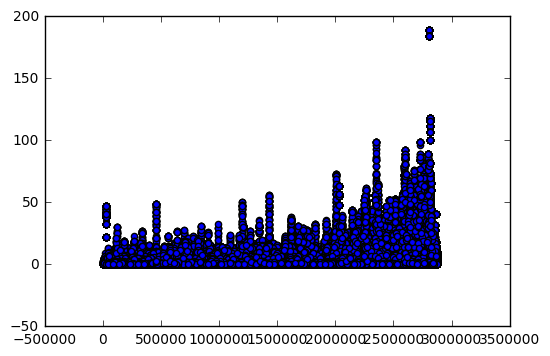

In [125]:
# # ad id vs messages sent
# ad_ids_unique = user_dt['ad_id'].unique()
# ad_ids_unique_count = np.zeros(np.shape(ad_ids_unique))
# # print(ad_ids_unique[0])
# # print(np.where(user_dt['ad_id'] == ad_ids_unique[0]))
# # print(user_dt['ad_messages'].values)
# # print(user_dt['ad_messages'].values[np.where(user_dt['ad_id'] == ad_ids_unique[0])])
# for i in range(0, len(ad_ids_unique)):
#     ad_ids_unique_count[i] = sum(user_dt['ad_messages'].values[np.where(user_dt['ad_id'] == ad_ids_unique[0])])
    
ad_ids = user_dt['ad_id']
user_messages = user_dt['ad_messages']
plt.scatter(ad_ids, user_messages)
plt.show()



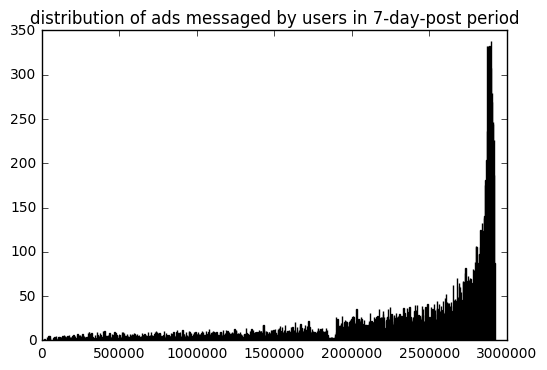

In [377]:
# distribution of ads chosen by user during the post-7-day period
# ads_ = np.zeros(1)
# for a in user_ad_interests_dt['ads'].values:
#     print(a)
#     print(ads_)
#     ads_ = np.hstack((ads_, a))
ads_ = sum(user_ad_interests_dt['ads'].apply(eval).tolist(), [])
hist, bins = np.histogram(ads_, bins=1000)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.title('distribution of ads messaged by users in 7-day-post period')
plt.show()